# Initialization

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('insurance.txt')
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


## Function to normalize dataset
### normalize_dataset function normalizes the dataset by using the formula
## $X_{normalized} = \frac {X - min(X_i)} {max(X_i) - min(X_i)}$

In [3]:
def normalize_dataset(dataset):

    # normalize_coeff stores max and min of every column in dataset for denormalization
    normalize_coeff = {col: {'max': dataset[col].max(), 'min': dataset[col].min()} for col in dataset.columns}

    # normal_df is the normalized dataframe
    normal_df = (dataset - dataset.min()) / (dataset.max() - dataset.min())

    return pd.DataFrame(normal_df), normalize_coeff

In [4]:
normal_df, normalize_coeff = normalize_dataset(df)

# Inserting bias column in dataframe
normal_df.insert(0, 'bias', [1] * len(normal_df))

normal_df.head()

,bias,age,bmi,children,charges
0,1,0.021739,0.321227,0.0,0.251611
1,1,0.000000,0.479150,0.2,0.009636
2,1,0.217391,0.458434,0.6,0.053115
3,1,0.326087,0.181464,0.0,0.333010
4,1,0.304348,0.347592,0.0,0.043816


## Function to shuffle the dataset and return $X_{train}, Y_{train}, X_{test}, Y_{test}$ matrices 

In [5]:
from math import ceil
def shuffle(dataframe, ratio, target):
    
    # Getting list of columns for X matrix
    columns = list(dataframe.columns)
    columns.remove(target)
    
    # Getting the max index for training set
    train_len = ceil(len(dataframe) * ratio)
    
    # Shuffling the dataset
    sf = dataframe.sample(frac = 1)
    
    # Dividing X and Y matrices
    X = sf[columns]
    Y = sf[target]
    
    # Generating train, validation and test sets
    X_train = X.iloc[:train_len].to_numpy().reshape((-1, len(columns)))
    X_test = X.iloc[train_len:].to_numpy().reshape((-1, len(columns)))
    
    Y_train = Y.iloc[:train_len].to_numpy().reshape((-1, 1))
    Y_test = Y.iloc[train_len:].to_numpy().reshape((-1, 1))
    
    return X_train, Y_train, X_test, Y_test

## Function to initialize weights

In [6]:
def initialize_weights(X):
    num_features = X.shape[1]
    W = np.zeros((num_features, 1))
    return W

## Function to predict the results

In [7]:
def predict(W, X):
    predictions = X @ W         # '@' performs matrix multiplication
    return predictions

## Function to normalize a value

In [8]:
def normalize(value, name):
    nc = normalize_coeff[name]
    out = (value - nc['min']) / (nc['max'] - nc['min'])
    return out

## Function to denormalize a value

In [9]:
def denormalize(value, name):
    nc = normalize_coeff[name]
    out = value * (nc['max'] - nc['min']) + nc['min']
    return out

## Functions to calculate Error and Accuracy
### Metric used for error -> MSE
## $ MSE = \frac {\sum_{i=1}^{m}{(y_i - \hat y_i)^2}} {2m} $

In [10]:
def calculate_error(y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    sq_err = np.sum((y - y_hat) ** 2)
    mse = sq_err / (2 * len(y))
    return mse

### Metric used for accuracy -> $ R^2 $
## $ R^2 = 1- \frac {2 \times MSE} {Var(Y)} $

In [11]:
def calculate_accuracy(y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    mse = calculate_error(y, y_hat)
    var_y = np.var(y)
    rMSE = 2 * mse / var_y
    R2 = 1 - rMSE
    return R2

# Building Normal Equation Model
## Function to generate weight matrix W using normal equation
### $ W = (X^TX)^{-1}X^TY $

In [12]:
def get_weight_by_equations(X, Y):
    W = np.linalg.inv(X.T @ X) @ X.T @ Y    # '@' performs matrix multiplication
    return W

## Generating the model 20 times with different train-test split

In [13]:
W_normal = {}
train_accuracy_normal = {}
test_accuracy_normal = {}
train_cost_normal = {}
test_cost_normal = {}

for i in range(1, 21):
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W_normal[i] = get_weight_by_equations(X_train, Y_train)
    train_predictions = predict(W_normal[i], X_train)
    test_predictions = predict(W_normal[i], X_test)
    train_accuracy_normal[i] = calculate_accuracy(Y_train, train_predictions)
    test_accuracy_normal[i] = calculate_accuracy(Y_test, test_predictions)
    train_cost_normal[i] = calculate_error(Y_train, train_predictions)
    test_cost_normal[i] = calculate_error(Y_test, test_predictions)

## Analyzing the models
### Analyzing costs

In [14]:
train_mean_cost_normal = np.mean(list(train_cost_normal.values()))
train_var_cost_normal = np.var(list(train_cost_normal.values()))
train_max_cost_normal = np.max(list(train_cost_normal.values()))
train_min_cost_normal = np.min(list(train_cost_normal.values()))

test_mean_cost_normal = np.mean(list(test_cost_normal.values()))
test_var_cost_normal = np.var(list(test_cost_normal.values()))
test_max_cost_normal = np.max(list(test_cost_normal.values()))
test_min_cost_normal = np.min(list(test_cost_normal.values()))

print(f'Mean train cost = {train_mean_cost_normal}')
print(f'Variance train cost = {train_var_cost_normal}')
print(f'Max train cost = {train_max_cost_normal}')
print(f'Min train cost = {train_min_cost_normal}')
print()
print(f'Mean test cost = {test_mean_cost_normal}')
print(f'Variance test cost = {test_var_cost_normal}')
print(f'Max test cost = {test_max_cost_normal}')
print(f'Min test cost = {test_min_cost_normal}')

Mean train cost = 0.01641183708883813
Variance train cost = 2.954623951256763e-07
Max train cost = 0.017464995196974448
Min train cost = 0.015462605252278718

Mean test cost = 0.016534668300305956
Variance test cost = 1.6278320443356039e-06
Max test cost = 0.018779540513717906
Min test cost = 0.014073268373621132


### Analyzing accuracies

In [15]:
train_mean_accuracy_normal = np.mean(list(train_accuracy_normal.values()))
train_var_accuracy_normal = np.var(list(train_accuracy_normal.values()))
train_max_accuracy_normal = np.max(list(train_accuracy_normal.values()))
train_min_accuracy_normal = np.min(list(train_accuracy_normal.values()))

test_mean_accuracy_normal = np.mean(list(test_accuracy_normal.values()))
test_var_accuracy_normal = np.var(list(test_accuracy_normal.values()))
test_max_accuracy_normal = np.max(list(test_accuracy_normal.values()))
test_min_accuracy_normal = np.min(list(test_accuracy_normal.values()))

print(f'Mean train accuracy = {train_mean_accuracy_normal}')
print(f'Variance train accuracy = {train_var_accuracy_normal}')
print(f'Max train accuracy = {train_max_accuracy_normal}')
print(f'Min train accuracy = {train_min_accuracy_normal}')
print()
print(f'Mean test accuracy = {test_mean_accuracy_normal}')
print(f'Variance test accuracy = {test_var_accuracy_normal}')
print(f'Max test accuracy = {test_max_accuracy_normal}')
print(f'Min test accuracy = {test_min_accuracy_normal}')

Mean train accuracy = 0.12219135236608396
Variance train accuracy = 0.00016501768175132512
Max train accuracy = 0.1390050537897468
Min train accuracy = 0.09219562516102475

Mean test accuracy = 0.10995705915849718
Variance test accuracy = 0.0009497830994676786
Max test accuracy = 0.1799669650735204
Min test accuracy = 0.06779912269816879


### Finding best model

In [16]:
best_normal_model = np.argmin(list(test_cost_normal.values())) + 1
print(f'Best Normal Model is {best_normal_model}')

Best Normal Model is 18


## Visualizing the results
### Cost vs model number plot

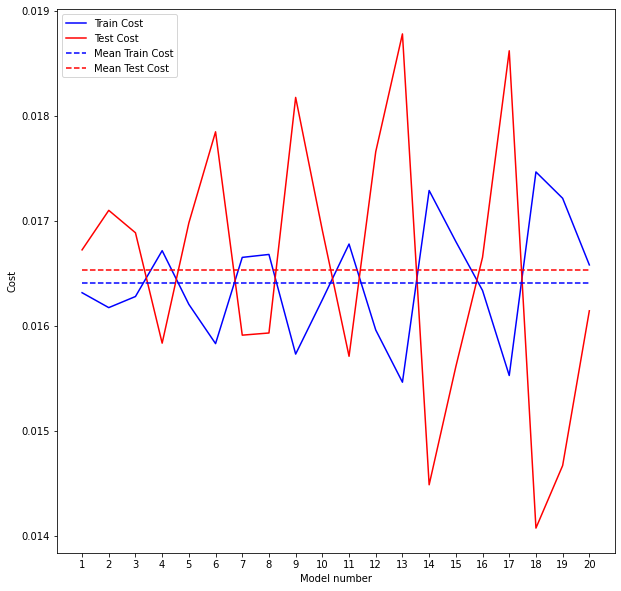

In [17]:
plt.figure(figsize = (10, 10))
plt.plot(list(train_cost_normal.keys()), list(train_cost_normal.values()), 'b-', label = 'Train Cost')
plt.plot(list(test_cost_normal.keys()), list(test_cost_normal.values()), 'r-', label = 'Test Cost')
plt.plot(list(train_cost_normal.keys()), [train_mean_cost_normal] * len(train_cost_normal), 'b--', label = 'Mean Train Cost')
plt.plot(list(test_cost_normal.keys()), [test_mean_cost_normal] * len(test_cost_normal), 'r--', label = 'Mean Test Cost')
plt.xlabel('Model number')
plt.ylabel('Cost')
plt.legend()
plt.xticks(list(train_cost_normal.keys()));

### Accuracy vs model number plot

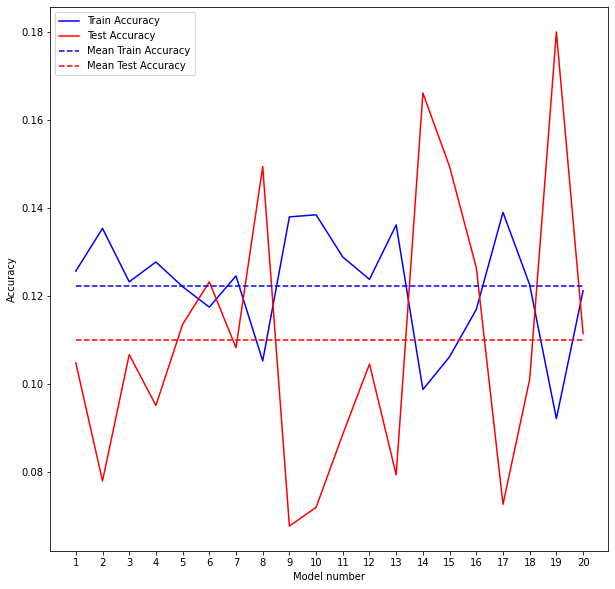

In [18]:
plt.figure(figsize = (10, 10))
plt.plot(list(train_accuracy_normal.keys()), list(train_accuracy_normal.values()), 'b-', label = 'Train Accuracy')
plt.plot(list(test_accuracy_normal.keys()), list(test_accuracy_normal.values()), 'r-', label = 'Test Accuracy')
plt.plot(list(train_accuracy_normal.keys()), [train_mean_accuracy_normal] * len(train_accuracy_normal), 'b--', label = 'Mean Train Accuracy')
plt.plot(list(test_accuracy_normal.keys()), [test_mean_accuracy_normal] * len(test_accuracy_normal), 'r--', label = 'Mean Test Accuracy')
plt.xlabel('Model number')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(list(train_accuracy_normal.keys()));

# Building Gradient Descent model
## Function for finding W using Gradient Descent

In [19]:
def gradient_descent(X, y, W, eta = 0.1, num_iterations = 1000):
    print_space = num_iterations // 5 if num_iterations > 5 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, num_iterations + 1):
        dW = (1 / m) * (X.T @ (X @ W - y))
        W = W - (eta * dW)
        prediction = predict(W, X)
        cost = calculate_error(y, prediction)
        J[i] = cost
        acc = calculate_accuracy(y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} iterations is {cost}, accuracy = {acc}')
    return W, J, accuracy

## Function for analyzing models

In [20]:
def analyze_cost_accuracy(train_cost_dict, test_cost_dict, train_acc_dict, test_acc_dict):
    
    train_costs = [list(x.values())[-1] for x in list(train_cost_dict.values())]
    test_costs = list(test_cost_dict.values())
    
    train_accuracies = [list(x.values())[-1] for x in list(train_acc_dict.values())]
    test_accuracies = list(test_acc_dict.values())

    train_mean_cost = np.mean(train_costs)
    train_var_cost = np.var(train_costs)
    train_max_cost = np.max(train_costs)
    train_min_cost = np.min(train_costs)

    test_mean_cost = np.mean(test_costs)
    test_var_cost = np.var(test_costs)
    test_max_cost = np.max(test_costs)
    test_min_cost = np.min(test_costs)
    
    train_mean_accuracy = np.mean(train_accuracies)
    train_var_accuracy = np.var(train_accuracies)
    train_max_accuracy = np.max(train_accuracies)
    train_min_accuracy = np.min(train_accuracies)

    test_mean_accuracy = np.mean(test_accuracies)
    test_var_accuracy = np.var(test_accuracies)
    test_max_accuracy = np.max(test_accuracies)
    test_min_accuracy = np.min(test_accuracies)
    
    best_model_number = np.argmin(test_costs) + 1

    print(f'Mean train cost = {train_mean_cost}')
    print(f'Variance train cost = {train_var_cost}')
    print(f'Max train cost = {train_max_cost}')
    print(f'Min train cost = {train_min_cost}')
    print()
    print(f'Mean test cost = {test_mean_cost}')
    print(f'Variance test cost = {test_var_cost}')
    print(f'Max test cost = {test_max_cost}')
    print(f'Min test cost = {test_min_cost}')
    print()
    print(f'Mean train accuracy = {train_mean_accuracy}')
    print(f'Variance train accuracy = {train_var_accuracy}')
    print(f'Max train accuracy = {train_max_accuracy}')
    print(f'Min train accuracy = {train_min_accuracy}')
    print()
    print(f'Mean test accuracy = {test_mean_accuracy}')
    print(f'Variance test accuracy = {test_var_accuracy}')
    print(f'Max test accuracy = {test_max_accuracy}')
    print(f'Min test accuracy = {test_min_accuracy}')
    print()
    print(f'Best model number is {best_model_number}')
    
    return best_model_number

## Function for generating and analyzing 20 models with different train-test split

In [21]:
def generate_gd_models(eta, num_iterations = 10000):
    temp_W_gd = {}
    temp_train_cost_gd = {}
    temp_train_accuracy_gd = {}
    temp_test_cost_gd = {}
    temp_test_accuracy_gd = {}

    for i in range(1, 21):
        print(f'Training model {i}')
        X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
        W_init = initialize_weights(X_train)
        temp_W_gd[i], temp_train_cost_gd[i], temp_train_accuracy_gd[i] = \
                                                                gradient_descent(X_train, Y_train, W_init, eta, num_iterations)
        predictions = predict(temp_W_gd[i], X_test)
        temp_test_cost_gd[i] = calculate_error(Y_test, predictions)
        temp_test_accuracy_gd[i] = calculate_accuracy(Y_test, predictions)
        print()
        print(f'Test Cost = {temp_test_cost_gd[i]}, test accuracy = {temp_test_accuracy_gd[i]}')
        print()
        
    best_model = analyze_cost_accuracy(temp_train_cost_gd, temp_test_cost_gd, temp_train_accuracy_gd, temp_test_accuracy_gd)
    
    return temp_W_gd[best_model], temp_train_cost_gd[best_model], temp_train_accuracy_gd[best_model], \
                                                                temp_test_cost_gd[best_model], temp_test_accuracy_gd[best_model]

## Applying Gradient Descent

In [22]:
# Initializing important variables
W_gd = {}
train_cost_gd = {}
train_accuracy_gd = {}
test_cost_gd = {}
test_accuracy_gd = {}

### Learning Rate = 0.001

In [23]:
eta = 0.001
W_gd[eta], train_cost_gd[eta], train_accuracy_gd[eta], test_cost_gd[eta], test_accuracy_gd[eta] = generate_gd_models(eta)

Training model 1
Cost after 1 iterations is 0.03801115399131591, accuracy = -0.9870179815066225
Cost after 2000 iterations is 0.01776398762499668, accuracy = 0.0713946005902999
Cost after 4000 iterations is 0.01756266654460788, accuracy = 0.08191858012747144
Cost after 6000 iterations is 0.01745656074051565, accuracy = 0.08746521890412229
Cost after 8000 iterations is 0.017373511652816285, accuracy = 0.09180657698664885
Cost after 10000 iterations is 0.01730774773070862, accuracy = 0.09524435990142655

Test Cost = 0.015552678757057245, test accuracy = 0.11578116754466772

Training model 2
Cost after 1 iterations is 0.03815935276814758, accuracy = -0.995628017928498
Cost after 2000 iterations is 0.017723875937227653, accuracy = 0.07309058354510334
Cost after 4000 iterations is 0.017531125642214228, accuracy = 0.08317088788176008
Cost after 6000 iterations is 0.01743137485124077, accuracy = 0.08838757681478959
Cost after 8000 iterations is 0.017352918305940167, accuracy = 0.0924906359243

Cost after 2000 iterations is 0.016916107729436636, accuracy = 0.07709829424992198
Cost after 4000 iterations is 0.016716012081724616, accuracy = 0.0880150262511753
Cost after 6000 iterations is 0.016610231582535443, accuracy = 0.0937861530788261
Cost after 8000 iterations is 0.016528942101506686, accuracy = 0.09822110950620966
Cost after 10000 iterations is 0.016465729474603973, accuracy = 0.10166983672683028

Test Cost = 0.01748289561404126, test accuracy = 0.10078685907012397

Training model 16
Cost after 1 iterations is 0.040677423455811774, accuracy = -1.0337082462448919
Cost after 2000 iterations is 0.018430261418855256, accuracy = 0.07856074835487603
Cost after 4000 iterations is 0.01822147021812639, accuracy = 0.08899947211344794
Cost after 6000 iterations is 0.018111682797432017, accuracy = 0.09448840341320552
Cost after 8000 iterations is 0.01802589823077637, accuracy = 0.09877728815040265
Cost after 10000 iterations is 0.017958035210377317, accuracy = 0.10217016735649509

Te

### Learning Rate = 0.01

In [24]:
eta = 0.01
W_gd[eta], train_cost_gd[eta], train_accuracy_gd[eta], test_cost_gd[eta], test_accuracy_gd[eta] = generate_gd_models(eta)

Training model 1
Cost after 1 iterations is 0.03939139135358302, accuracy = -0.9596370204085287
Cost after 2000 iterations is 0.017570202220952985, accuracy = 0.12592021898429906
Cost after 4000 iterations is 0.017419064638883916, accuracy = 0.13343898871596638
Cost after 6000 iterations is 0.017370271504724224, accuracy = 0.13586634222533645
Cost after 8000 iterations is 0.017351576017696352, accuracy = 0.1367964025059072
Cost after 10000 iterations is 0.017344249989878786, accuracy = 0.13716085663739452

Test Cost = 0.01437657687933492, test accuracy = 0.05399306456215014

Training model 2
Cost after 1 iterations is 0.036096645908721275, accuracy = -0.9761324762490307
Cost after 2000 iterations is 0.016533935599320936, accuracy = 0.09483980365793676
Cost after 4000 iterations is 0.016431262837245372, accuracy = 0.10046068544503628
Cost after 6000 iterations is 0.016396977025619264, accuracy = 0.10233768271509391
Cost after 8000 iterations is 0.016383842795518876, accuracy = 0.1030567

Cost after 2000 iterations is 0.01640349418859109, accuracy = 0.1243953531370997
Cost after 4000 iterations is 0.016284164680902085, accuracy = 0.13076506133701626
Cost after 6000 iterations is 0.016248270461558842, accuracy = 0.13268106440874716
Cost after 8000 iterations is 0.016234830746888293, accuracy = 0.13339846501149366
Cost after 10000 iterations is 0.016229639728661024, accuracy = 0.13367555717426638

Test Cost = 0.016921660768176524, test accuracy = 0.08610791730144407

Training model 16
Cost after 1 iterations is 0.03366964184345667, accuracy = -0.9830263496732972
Cost after 2000 iterations is 0.015110634443339344, accuracy = 0.11003549129685375
Cost after 4000 iterations is 0.01504607800208319, accuracy = 0.11383764412780129
Cost after 6000 iterations is 0.015029968917887477, accuracy = 0.11478641390021915
Cost after 8000 iterations is 0.015023855090516337, accuracy = 0.11514649734959748
Cost after 10000 iterations is 0.015021350417501507, accuracy = 0.11529401399408146

T

### Learning Rate = 0.1

In [25]:
eta = 0.1
W_gd[eta], train_cost_gd[eta], train_accuracy_gd[eta], test_cost_gd[eta], test_accuracy_gd[eta] = generate_gd_models(eta)

Training model 1
Cost after 1 iterations is 0.031033232516558554, accuracy = -0.7170128202801267
Cost after 2000 iterations is 0.01573994508514026, accuracy = 0.1291372084016459
Cost after 4000 iterations is 0.01573990475030272, accuracy = 0.12913944005550693
Cost after 6000 iterations is 0.015739904745115815, accuracy = 0.12913944034248892
Cost after 8000 iterations is 0.01573990474511515, accuracy = 0.12913944034252578
Cost after 10000 iterations is 0.01573990474511515, accuracy = 0.12913944034252578

Test Cost = 0.01812306653244937, test accuracy = 0.09459093939354091

Training model 2
Cost after 1 iterations is 0.033094680338718804, accuracy = -0.7442113195374591
Cost after 2000 iterations is 0.017156733933608555, accuracy = 0.0957770485463173
Cost after 4000 iterations is 0.017156708597098964, accuracy = 0.09577838387351723
Cost after 6000 iterations is 0.017156708594145465, accuracy = 0.09577838402917738
Cost after 8000 iterations is 0.017156708594145118, accuracy = 0.09577838402

Cost after 2000 iterations is 0.015086803134323637, accuracy = 0.1301436638879816
Cost after 4000 iterations is 0.015086776296410306, accuracy = 0.13014521127537382
Cost after 6000 iterations is 0.015086776292826206, accuracy = 0.13014521148202152
Cost after 8000 iterations is 0.015086776292825732, accuracy = 0.13014521148204883
Cost after 10000 iterations is 0.015086776292825729, accuracy = 0.13014521148204905

Test Cost = 0.019769103366641234, test accuracy = 0.08867763996844658

Training model 16
Cost after 1 iterations is 0.03007177154627474, accuracy = -0.7143773163234663
Cost after 2000 iterations is 0.015368757001729088, accuracy = 0.12383451226651332
Cost after 4000 iterations is 0.01536872215677804, accuracy = 0.12383649876051062
Cost after 6000 iterations is 0.015368722153247761, accuracy = 0.12383649896177007
Cost after 8000 iterations is 0.015368722153247406, accuracy = 0.12383649896179039
Cost after 10000 iterations is 0.015368722153247404, accuracy = 0.12383649896179039



## Finding best learning rate

In [26]:
best_eta_gd = min(test_cost_gd, key = test_cost_gd.get)
print(f'Best eta for GD is {best_eta_gd}')

Best eta for GD is 0.01


## Visualizing the results
### Cost vs iterations plot

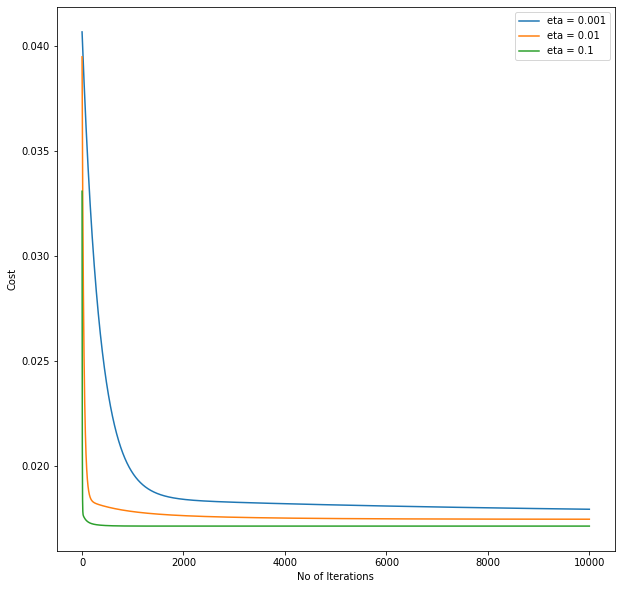

In [27]:
plt.figure(figsize = (10, 10))
for eta, error in train_cost_gd.items():
    plt.plot(list(error.keys()), list(error.values()), label = f'eta = {eta}')
plt.xlabel('No of Iterations')
plt.ylabel('Cost')
plt.legend();

### Accuracy vs iterations plot

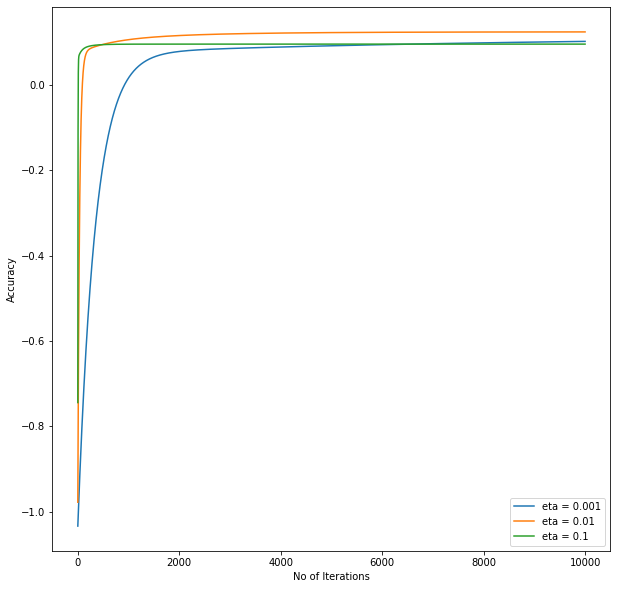

In [28]:
plt.figure(figsize = (10, 10))
for eta, accuracy in train_accuracy_gd.items():
    plt.plot(list(accuracy.keys()), list(accuracy.values()), label = f'eta = {eta}')
plt.xlabel('No of Iterations')
plt.ylabel('Accuracy')
plt.legend();

# Building Stochastic Gradient Descent model
## Function for finding W using Stochastic Gradient Descent

In [29]:
def stochastic_gradient_descent(X, Y, W, eta = 0.1, epochs = 1000):
    print_space = epochs // 5 if epochs > 5 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, epochs + 1):
        j = np.random.choice(m, replace=False)
        x = np.array(X[j]).reshape((1, len(W)))
        y = np.array(Y[j]).reshape((1, 1))
        dW = (1 / m) * x.T @ (x @ W - y)
        W = W - (eta * dW)
        prediction = predict(W, X)
        cost = calculate_error(Y, prediction)
        J[i] = cost
        acc = calculate_accuracy(Y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} epochs is {cost}, accuracy = {acc}')
    return W, J, accuracy

## Function for generating and analyzing 20 models with different train-test split

In [30]:
def generate_sgd_models(eta, epochs = 10000):
    temp_W_sgd = {}
    temp_train_cost_sgd = {}
    temp_train_accuracy_sgd = {}
    temp_test_cost_sgd = {}
    temp_test_accuracy_sgd = {}

    for i in range(1, 21):
        print(f'Training model {i}')
        X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
        W_init = initialize_weights(X_train)
        temp_W_sgd[i], temp_train_cost_sgd[i], temp_train_accuracy_sgd[i] = \
                                                            stochastic_gradient_descent(X_train, Y_train, W_init, eta, epochs)
        predictions = predict(temp_W_sgd[i], X_test)
        temp_test_cost_sgd[i] = calculate_error(Y_test, predictions)
        temp_test_accuracy_sgd[i] = calculate_accuracy(Y_test, predictions)
        print()
        print(f'Test Cost = {temp_test_cost_sgd[i]}, test accuracy = {temp_test_accuracy_sgd[i]}')
        print()
        
    best_model = analyze_cost_accuracy(temp_train_cost_sgd, temp_test_cost_sgd, temp_train_accuracy_sgd, temp_test_accuracy_sgd)
    
    return temp_W_sgd[best_model], temp_train_cost_sgd[best_model], temp_train_accuracy_sgd[best_model], \
                                                            temp_test_cost_sgd[best_model], temp_test_accuracy_sgd[best_model]

## Applying Stochastic Gradient Descent

In [31]:
# Initializing important variables
W_sgd = {}
train_cost_sgd = {}
train_accuracy_sgd = {}
test_cost_sgd = {}
test_accuracy_sgd = {}

### Learning Rate = 0.001

In [32]:
eta = 0.001
W_sgd[eta], train_cost_sgd[eta], train_accuracy_sgd[eta], test_cost_sgd[eta], test_accuracy_sgd[eta] = generate_sgd_models(eta)

Training model 1
Cost after 1 epochs is 0.03798204762537006, accuracy = -1.0028181199002812
Cost after 2000 epochs is 0.03785693156598381, accuracy = -0.9962206685648269
Cost after 4000 epochs is 0.03773655452794666, accuracy = -0.9898731089129955
Cost after 6000 epochs is 0.03761406311520187, accuracy = -0.9834140569051313
Cost after 8000 epochs is 0.037491468206764, accuracy = -0.9769495475019343
Cost after 10000 epochs is 0.03736984874307869, accuracy = -0.9705364739361271

Test Cost = 0.03567055882569825, test accuracy = -0.9846852926697494

Training model 2
Cost after 1 epochs is 0.038184920120089665, accuracy = -1.01765028485848
Cost after 2000 epochs is 0.03805138573219858, accuracy = -1.0105944708114816
Cost after 4000 epochs is 0.03792611793282273, accuracy = -1.0039754544484931
Cost after 6000 epochs is 0.03779861463915198, accuracy = -0.9972383169610737
Cost after 8000 epochs is 0.037669875206928286, accuracy = -0.9904358632363637
Cost after 10000 epochs is 0.037547006055708

Cost after 2000 epochs is 0.03651511528363168, accuracy = -0.9524170277955639
Cost after 4000 epochs is 0.036401272182261295, accuracy = -0.9463299811605987
Cost after 6000 epochs is 0.03628367846746383, accuracy = -0.9400423939696794
Cost after 8000 epochs is 0.036171927064191395, accuracy = -0.9340671877863114
Cost after 10000 epochs is 0.036051536888274276, accuracy = -0.927630077356449

Test Cost = 0.038809407696962187, test accuracy = -1.0968003728811886

Training model 17
Cost after 1 epochs is 0.038310170134216816, accuracy = -1.0214447852229864
Cost after 2000 epochs is 0.038187469571784545, accuracy = -1.0149704623159441
Cost after 4000 epochs is 0.038059693980521205, accuracy = -1.0082283543656754
Cost after 6000 epochs is 0.03793328874020266, accuracy = -1.0015585532927074
Cost after 8000 epochs is 0.037812976592739286, accuracy = -0.9952102556412805
Cost after 10000 epochs is 0.03768852671118196, accuracy = -0.988643629515259

Test Cost = 0.034921682548330515, test accuracy

### Learning Rate = 0.01

In [33]:
eta = 0.01
W_sgd[eta], train_cost_sgd[eta], train_accuracy_sgd[eta], test_cost_sgd[eta], test_accuracy_sgd[eta] = generate_sgd_models(eta)

Training model 1
Cost after 1 epochs is 0.03633831695936573, accuracy = -1.011697818514158
Cost after 2000 epochs is 0.03519597889472906, accuracy = -0.9484577131673697
Cost after 4000 epochs is 0.03409476488309907, accuracy = -0.8874942451181898
Cost after 6000 epochs is 0.033104124397714756, accuracy = -0.8326521536254026
Cost after 8000 epochs is 0.032163384078669546, accuracy = -0.7805725471392855
Cost after 10000 epochs is 0.031220715590678502, accuracy = -0.7283861967644407

Test Cost = 0.034680594399699845, test accuracy = -0.729408010369331

Training model 2
Cost after 1 epochs is 0.037996742997688626, accuracy = -1.0290357397962229
Cost after 2000 epochs is 0.03679511563529105, accuracy = -0.9648685330340523
Cost after 4000 epochs is 0.03568264608818431, accuracy = -0.905462376283938
Cost after 6000 epochs is 0.03456407698624372, accuracy = -0.845730501754395
Cost after 8000 epochs is 0.033551294324543825, accuracy = -0.7916476500383931
Cost after 10000 epochs is 0.03258901304

Cost after 2000 epochs is 0.038914286038286346, accuracy = -0.9790068851824536
Cost after 4000 epochs is 0.03768313152246684, accuracy = -0.9163958620447525
Cost after 6000 epochs is 0.0365065723045226, accuracy = -0.8565613120585163
Cost after 8000 epochs is 0.03542076558854971, accuracy = -0.8013420292282067
Cost after 10000 epochs is 0.03443326884258048, accuracy = -0.7511223526434778

Test Cost = 0.026137280745701624, test accuracy = -0.6299402480602856

Training model 17
Cost after 1 epochs is 0.03350283497311252, accuracy = -0.9786876061162397
Cost after 2000 epochs is 0.032457752167099965, accuracy = -0.9169646982703274
Cost after 4000 epochs is 0.03150641296335212, accuracy = -0.8607783160379263
Cost after 6000 epochs is 0.030583032789998386, accuracy = -0.8062432026299176
Cost after 8000 epochs is 0.029690767637308928, accuracy = -0.7535457517899231
Cost after 10000 epochs is 0.028826329977156506, accuracy = -0.7024918011085424

Test Cost = 0.04093910011623662, test accuracy =

### Learning Rate = 0.1

In [34]:
eta = 0.1
W_sgd[eta], train_cost_sgd[eta], train_accuracy_sgd[eta], test_cost_sgd[eta], test_accuracy_sgd[eta] = generate_sgd_models(eta)

Training model 1
Cost after 1 epochs is 0.038847775918533195, accuracy = -0.9841922630924402
Cost after 2000 epochs is 0.0294379219443291, accuracy = -0.5035737717893636
Cost after 4000 epochs is 0.024331812078088932, accuracy = -0.24277367573392228
Cost after 6000 epochs is 0.021352712517772883, accuracy = -0.0906129365719881
Cost after 8000 epochs is 0.019886972414544186, accuracy = -0.01574867204807706
Cost after 10000 epochs is 0.0191201173182568, accuracy = 0.0234192832077742

Test Cost = 0.016142789807731338, test accuracy = 0.02271782807763867

Training model 2
Cost after 1 epochs is 0.036591463508067516, accuracy = -1.0402030922926224
Cost after 2000 epochs is 0.027570827191077733, accuracy = -0.537246163436468
Cost after 4000 epochs is 0.022876672956175525, accuracy = -0.27551768724052406
Cost after 6000 epochs is 0.020134369616695284, accuracy = -0.12261711380545393
Cost after 8000 epochs is 0.01858581166512372, accuracy = -0.036275316607479846
Cost after 10000 epochs is 0.01

Cost after 8000 epochs is 0.01901816671740744, accuracy = -0.013603263323980652
Cost after 10000 epochs is 0.018313758383848612, accuracy = 0.023939292497360043

Test Cost = 0.01799304452221687, test accuracy = 0.02467513605225713

Training model 16
Cost after 1 epochs is 0.038104628381746976, accuracy = -0.9763621653491381
Cost after 2000 epochs is 0.028663612228879816, accuracy = -0.48668760560681634
Cost after 4000 epochs is 0.023750819489843228, accuracy = -0.2318771506048476
Cost after 6000 epochs is 0.02118697004854815, accuracy = -0.09889868450716022
Cost after 8000 epochs is 0.019578982817170645, accuracy = -0.015497657875410464
Cost after 10000 epochs is 0.01869666805634069, accuracy = 0.030265116498442546

Test Cost = 0.016992380047806788, test accuracy = 0.014332220377239913

Training model 17
Cost after 1 epochs is 0.039005540679213004, accuracy = -1.0471804270231262
Cost after 2000 epochs is 0.029099039047961406, accuracy = -0.5272441337011147
Cost after 4000 epochs is 0.0

## Finding best learning rate

In [35]:
best_eta_sgd = min(test_cost_sgd, key = test_cost_sgd.get)
print(f'Best eta for SGD is {best_eta_sgd}')

Best eta for SGD is 0.1


## Visualizing the results
### Cost vs epochs plot

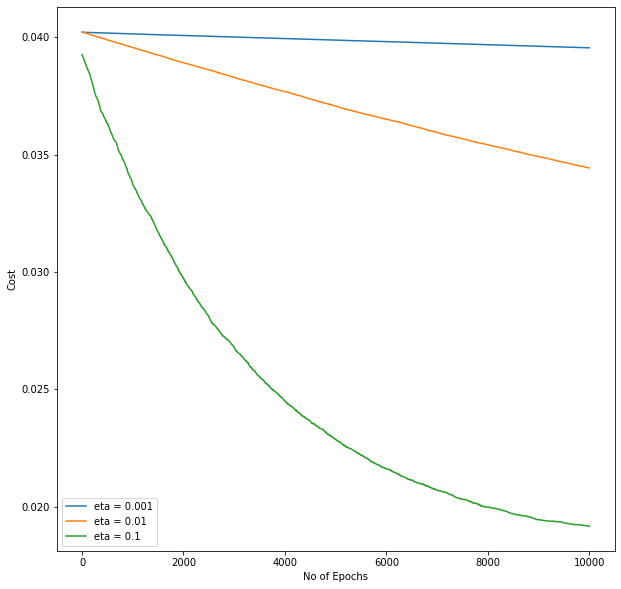

In [36]:
plt.figure(figsize = (10, 10))
for eta, error in train_cost_sgd.items():
    plt.plot(list(error.keys()), list(error.values()), label = f'eta = {eta}')
plt.xlabel('No of Epochs')
plt.ylabel('Cost')
plt.legend();

### Accuracy vs epochs plot

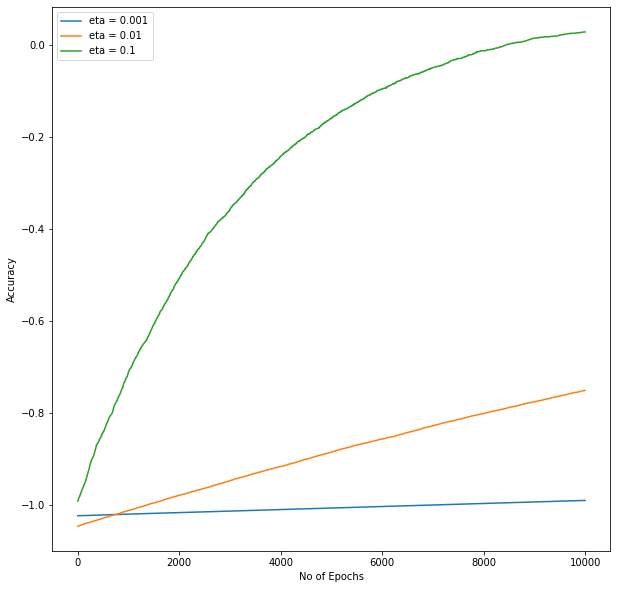

In [37]:
plt.figure(figsize = (10, 10))
for eta, accuracy in train_accuracy_sgd.items():
    plt.plot(list(accuracy.keys()), list(accuracy.values()), label = f'eta = {eta}')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Comparison between GD and SGD
## Cost comparison

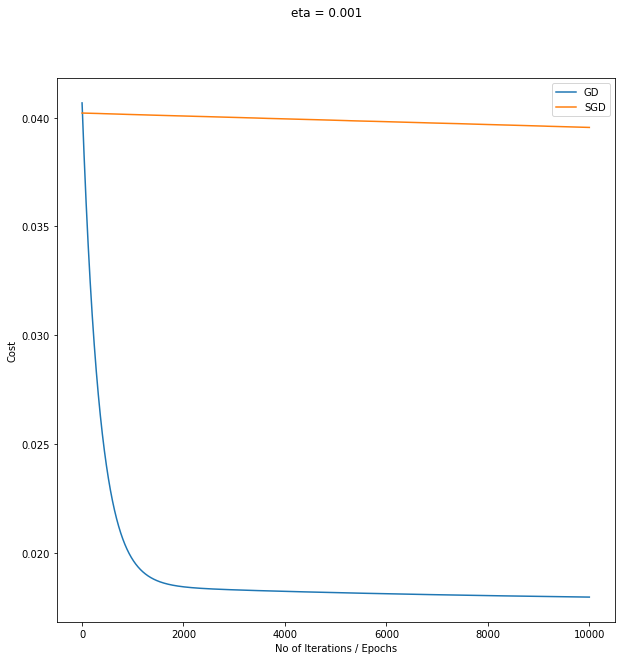

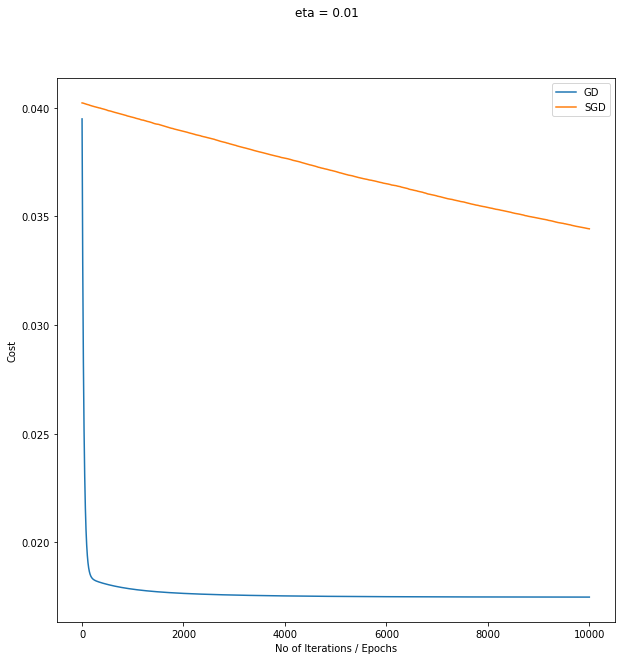

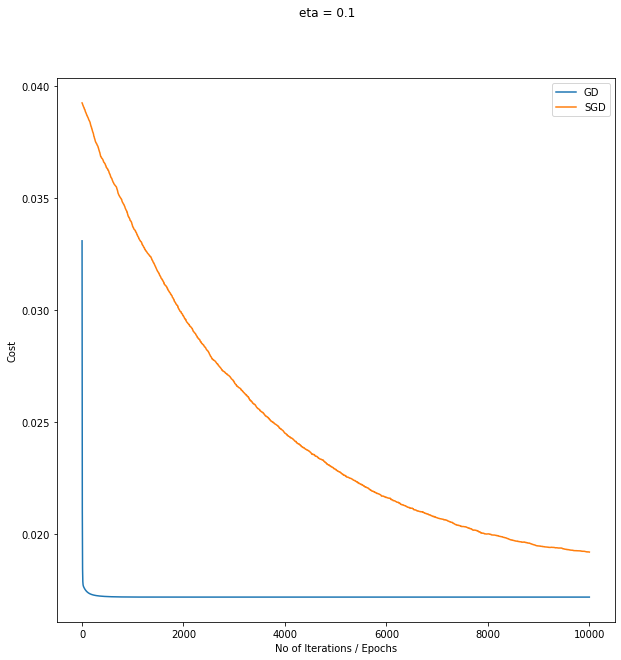

In [38]:
for eta in [0.001, 0.01, 0.1]:
    plt.figure(figsize = (10, 10)).suptitle(f'eta = {eta}')
    plt.plot(list(train_cost_gd[eta].keys()), list(train_cost_gd[eta].values()), label = 'GD')
    plt.plot(list(train_cost_sgd[eta].keys()), list(train_cost_sgd[eta].values()), label = 'SGD')
    plt.xlabel('No of Iterations / Epochs')
    plt.ylabel('Cost')
    plt.legend();

## Accuracy comparison

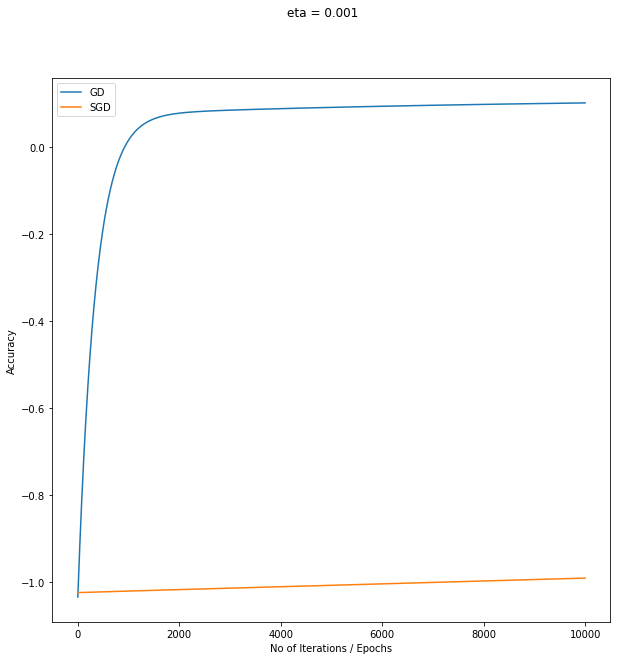

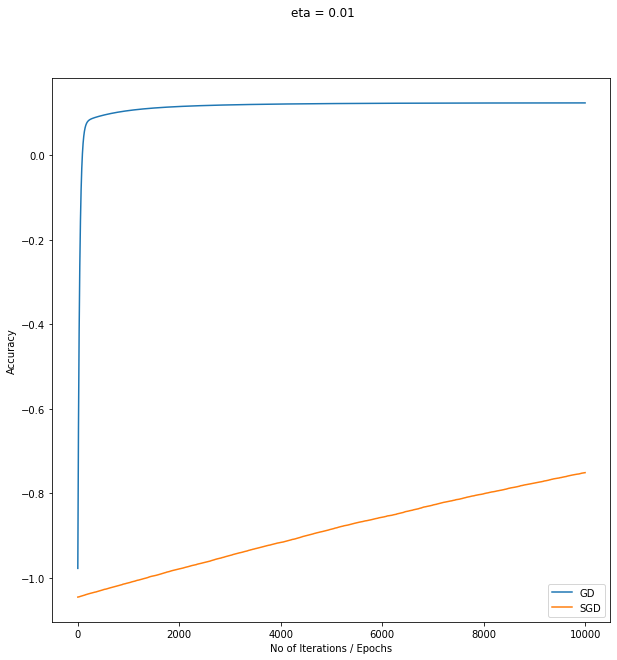

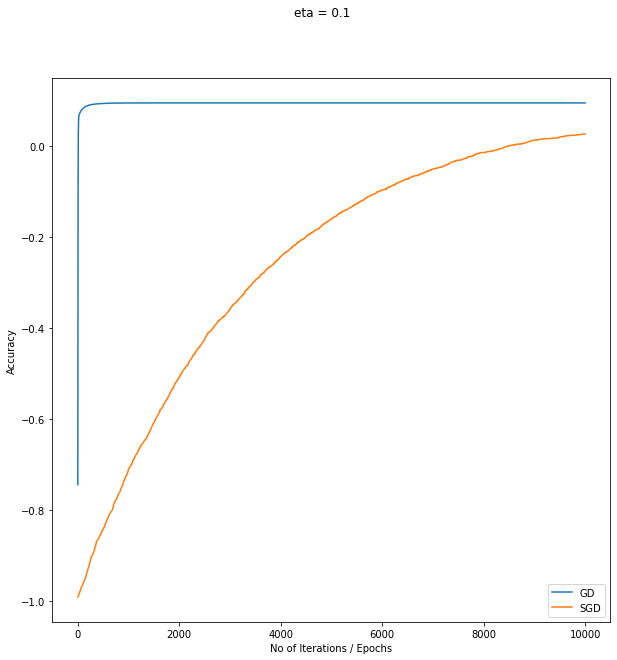

In [39]:
for eta in [0.001, 0.01, 0.1]:
    plt.figure(figsize = (10, 10)).suptitle(f'eta = {eta}')
    plt.plot(list(train_accuracy_gd[eta].keys()), list(train_accuracy_gd[eta].values()), label = 'GD')
    plt.plot(list(train_accuracy_sgd[eta].keys()), list(train_accuracy_sgd[eta].values()), label = 'SGD')
    plt.xlabel('No of Iterations / Epochs')
    plt.ylabel('Accuracy')
    plt.legend();

# Predicting the output

In [40]:
# Getting input from user
age = float(input('Enter Age: '))
bmi = float(input('Enter BMI: '))
children = int(input('Enter no of children: '))

# Normalizing the input
age_normalized = normalize(age, 'age')
bmi_normalized = normalize(bmi, 'bmi')
children_normalized = normalize(children, 'children')

# Generating X vector
X = np.array([1, age_normalized, bmi_normalized, children_normalized])

# Calculating normalized result using normal equations weights
charge_normalized = predict(W_normal[best_normal_model], X)[0]

# Denormalizing the result
charge = denormalize(charge_normalized, 'charges')

# Printing the result
print(f'Predicted charge using normal equations is {charge}')

# Calculating normalized result using gradient descent weights
charge_normalized = predict(W_gd[best_eta_gd], X)[0]

# Denormalizing the result
charge = denormalize(charge_normalized, 'charges')

# Printing the result
print(f'Predicted charge using GD is {charge}')

# Calculating normalized result using normal equations weights
charge_normalized = predict(W_sgd[best_eta_sgd], X)[0]

# Denormalizing the result
charge = denormalize(charge_normalized, 'charges')

# Printing the result
print(f'Predicted charge using SGD is {charge}')

Enter Age: 10
Enter BMI: 20
Enter no of children: 0
Predicted charge using normal equations is 1805.2962468096173
Predicted charge using GD is 2387.737037741555
Predicted charge using SGD is 7242.021654055079
